<b>Sample Survey - Data Analysis (Dhruv Research)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [5]:
survey = pd.read_excel('C:/Users/sathi/Downloads/Sample Survey.xlsx',sheet_name='Data')

In [6]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


2. How many samples were collected on each day?

In [12]:
survey.groupby('collection_date').agg({'response_id':'count'}).rename(columns={'response_id':'Count of Samples collected each day'})

,Count of Samples collected each day
collection_date,
2020-08-24,1479
2020-08-25,998
2020-08-26,598
2020-08-27,665
2020-08-28,761
2020-08-29,620
2020-08-30,582
2020-08-31,557
2020-09-01,607


3. What proportion of the total respondents were aged less than 45?

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [ ]:
survey['age'].astype(int)

ValueError: invalid literal for int() with base 10: '24ko'

In [211]:
# Found out that the age column has a wrong value '24ko' so replacing it with 24.

In [29]:
survey['age'].replace('24ko',24,inplace=True)

In [212]:
print('Total number of people aged below 45 are',len(survey[survey['age']<45]))

Total number of people aged below 45 are 6399


In [213]:
print('Proportion of people aged below 45 are',round(len(survey[survey['age']<45])/len(survey),2)*100,'/100','\nWhich means 93 people out of 100 are aged below 45')

Proportion of people aged below 45 are 93.0 /100 
Which means 93 people out of 100 are aged below 45


4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The
dataframe should look like this after the column creation:

In [194]:
survey['age_group'] = survey['age'].map(lambda x: '18-25' if x<25 else ('25-40' if x>=25 and x<40 else ('40-55' if x>=40 and x<55 else('55+' if x>=55 else 'NA'))))

In [195]:
survey[['response_id','age','age_group']].head()

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,25-40
3,4,36,25-40
4,5,22,18-25


5. How many samples were collected for each age-group? Which age-group had the most
samples?

In [190]:
survey['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

In [88]:
print(survey['age_group'].value_counts().idxmax(),'Age group has the most samples')

25-40 Age group has the most samples


6. What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?

In [117]:
 rjd_prop = round((len(survey[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')])/len(survey))*100,2)
print(rjd_prop,'% of people opted for RJD in the past and will opt for RJD in \n upcoming election')

11.81 % of people opted for RJD in the past and will opt for RJD in 
 upcoming election


7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.

In [191]:
round((survey[survey['CM_satisfaction']=='Fully Satisfied'].groupby('collection_date')['response_id'].count()/survey.groupby('collection_date')['response_id'].count())*100,2)

collection_date
2020-08-24     9.87
2020-08-25     9.52
2020-08-26     9.87
2020-08-27     8.12
2020-08-28    12.09
2020-08-29    11.77
2020-08-30    11.17
2020-08-31    11.13
2020-09-01    12.36
Name: response_id, dtype: float64

8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis.

In [192]:
round((survey[survey['MLA_satisfaction']=='Fully Dissatisfied'].groupby('collection_date')['response_id'].count()/survey.groupby('collection_date')['response_id'].count())*100,2)

collection_date
2020-08-24    59.97
2020-08-25    63.13
2020-08-26    59.03
2020-08-27    60.60
2020-08-28    60.71
2020-08-29    56.45
2020-08-30    62.03
2020-08-31    57.63
2020-09-01    63.43
Name: response_id, dtype: float64

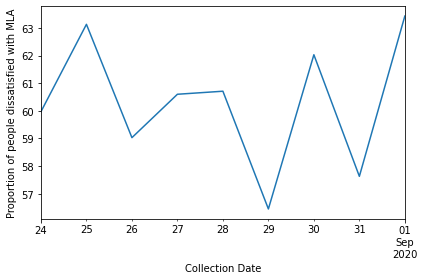

In [160]:
round((survey[survey['MLA_satisfaction']=='Fully Dissatisfied'].groupby('collection_date')['response_id'].count()/survey.groupby('collection_date')['response_id'].count())*100,2).plot.line(xlabel='Collection Date',ylabel='Proportion of people dissatisfied with MLA')
plt.tight_layout()

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.

In [168]:
pd.pivot_table(survey,values='response_id',index=['Past_Vote'],columns=['Vote_Now'],aggfunc='count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


10. Repeat the above question with the cell values as the sum of “weight”.

In [170]:
pd.pivot_table(survey,values='weight',index=['Past_Vote'],columns=['Vote_Now'],aggfunc='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.

In [208]:
df_age = pd.DataFrame(survey.groupby('age_group',as_index=False)['response_id'].count().rename(columns={'response_id':'Total_Count'}))
df_age.head()

,age_group,Total_Count
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,128


12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [206]:
df_jdu = pd.DataFrame(survey[survey['Vote_Now']=='JD(U)'].groupby('age_group',as_index=False)['response_id'].count().rename(columns={'response_id':'JD(U) Count'}))
df_jdu.head()

,age_group,JD(U) Count
0,18-25,181
1,25-40,264
2,40-55,68
3,55+,13


13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [209]:
df_jdu.merge(,how='inner',on='age_group')

,age_group,JD(U) Count,Total_Count
0,18-25,181,2094
1,25-40,264,3844
2,40-55,68,801
3,55+,13,128


Thank You!
   <b><br> - Sathish Pandurangan